In [2]:
import numpy as np

In [3]:
# Random data generation
n = 10
d = 2
data  = np.random.random((n, d)) 
print(data)

[[0.61622647 0.98992296]
 [0.51586886 0.17468212]
 [0.34255353 0.21025512]
 [0.1433654  0.18473186]
 [0.83646268 0.20496469]
 [0.37573081 0.91046702]
 [0.76687421 0.89211962]
 [0.19676688 0.24259009]
 [0.59629561 0.33882238]
 [0.93796882 0.28259734]]


In [37]:
def generateData(samples, dim):
    return np.random.random((samples, dim)) 
def sampleQueryPointsIndices(samples,data):
    return np.random.randint(data.shape[0], size=samples)
#data[np.random.randint(data.shape[0], size=samples),:]
# A[np.random.randint(A.shape[0], size=2), :]

In [38]:
data  = generateData(10,3)
data

array([[0.93372655, 0.2254289 , 0.24366637],
       [0.3665415 , 0.70955448, 0.77457198],
       [0.5960356 , 0.10750183, 0.38910236],
       [0.94670289, 0.33856233, 0.34150793],
       [0.80356542, 0.89910847, 0.28738839],
       [0.50404602, 0.60277146, 0.12252469],
       [0.97285375, 0.07130469, 0.50593201],
       [0.91411523, 0.48285617, 0.15351735],
       [0.91857749, 0.0565019 , 0.98745637],
       [0.31746978, 0.11827055, 0.88581668]])

In [39]:
sample= sampleQueryPoints(3,data)
print(sample)

[1 0 7]


In [28]:
def distance(point1 , point2, norm):
    if norm == '1':
        return np.linalg.norm(point1-point2,1)
    if norm == '2':
        return np.linalg.norm(point1-point2,2)
    if norm == 'inf':
        return np.linalg.norm(point1-point2,np.inf)
    

In [29]:
point1 = sample[0]
point2 = sample[1]
print(point1)
print(point2)

[0.32850621 0.22375265 0.81642042]
[0.73652635 0.73166707 0.51070564]


In [30]:
distance(point1,point2,'inf')

0.5079144150061609

In [77]:
def getRatio(query_point_index, data):
    query_point = data[query_point_index,:]
    
    farthest_distance1 = 0
    farthest_distance2 = 0
    farthest_distance_inf = 0
    
    closest_distance1 = 100000
    closest_distance2 = 100000
    closest_distance_inf = 100000
    
    
    for i in range(data.shape[0]):
        if i == query_point_index :
            continue
        point = data[i,:]
        curr1 = distance(query_point, point,'1')
        curr2 = distance(query_point, point,'2')
        curr_inf = distance(query_point, point,'inf')
        if farthest_distance1 < curr1:
            farthest_distance1 = curr1
        if farthest_distance2 < curr2:
            farthest_distance2 = curr2
        if farthest_distance_inf < curr_inf:
            farthest_distance_inf = curr_inf
            
        if closest_distance1 > curr1:
            closest_distance1 = curr1
        if closest_distance2 > curr2:
            closest_distance2 = curr2
        if closest_distance_inf > curr_inf:
            closest_distance_inf = curr_inf
#         print(curr1)
    
    
    print(closest_distance1)
    return farthest_distance1/closest_distance1 , farthest_distance2/closest_distance2,farthest_distance_inf/closest_distance_inf

In [78]:
def averageRatio(samples,dim): #100 samples
    data = generateData(100,dim)
    sample_indices = sampleQueryPointsIndices(samples,data)
    ratio1 = 0
    ratio2 = 0
    ratio_inf = 0
    for index in sample_indices:
        r1, r2, r_inf = getRatio(index,data)
        ratio1 = ratio1 + r1
        ratio2 = ratio2 + r2
        ratio_inf = ratio_inf + r_inf
        
    avg_ratio1 = ratio1/samples
    avg_ratio2 = ratio2/samples
    avg_ratio_inf = ratio_inf/samples
    return avg_ratio1,avg_ratio2,avg_ratio_inf
    
    

In [81]:
print(averageRatio(100,64))

18.031847943961733
16.07587793748415
15.448069541829497
17.38197460146762
15.448069541829497
17.08931787064271
17.854401208373556
17.1289900781735
17.903332771399235
16.07587793748415
17.291081211298888
16.96657215724433
17.854401208373556
16.98910303260967
15.637834958663019
17.1289900781735
15.968453468731672
16.539390940039706
16.98910303260967
16.423773704290383
15.980410803401723
17.616304268732023
17.34849824632483
15.637834958663019
15.891886215431807
16.98910303260967
17.585654585826486
17.290716515793108
17.903332771399235
15.732697745749613
17.290716515793108
16.772199949858237
16.143191594383776
16.423773704290383
15.959931290559144
15.448069541829497
16.5761672598328
15.959931290559144
17.649909205342176
17.38197460146762
16.234493657957007
16.868716904829892
17.238615030971168
16.539390940039706
16.008528010567822
16.85244258349437
17.290716515793108
17.389600538830756
17.66714264192929
17.08931787064271
15.873087328282375
16.85244258349437
16.78617651100865
15.44806954182

In [75]:
dimensions = [1, 2, 4, 8, 16, 32, 64]
ratio_dict = {}
for dim in dimensions:
    ratio_dict[dim] = averageRatio(100,dim)
print(ratio_dict)
    

{1: (556.6852959323118, 556.6852959323118, 556.6852959323118), 2: (28.17633879618016, 24.843847403265578, 22.668330235768703), 4: (8.290173929144771, 7.131113763088889, 6.52739896442312), 8: (3.5974033166625063, 3.0971100178138578, 2.872790568904545), 16: (2.370541394099987, 2.1281847056907597, 2.012586448288059), 32: (1.8460602834474895, 1.6613734573203933, 1.568425591983513), 64: (1.5147537159512934, 1.4053337314936758, 1.339394846867532)}


TypeError: float() argument must be a string or a number, not 'dict'

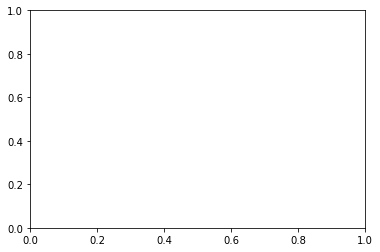